In [5]:
import gym
from MonteCarlo_Agent import MonteCarlo_Agent
from Q_Agent import Q_Agent
from SARSA_Agent import SARSA_Agent
import matplotlib.pyplot as plt

In [6]:
env = gym.make('Taxi-v3').env

q_agent = Q_Agent(env)

sarsa_agent = SARSA_Agent(env)

mc_agent = MonteCarlo_Agent(env)

In [8]:
print('Train Q Agent')
q_table_q, policy_q, all_epochs_q, acc_return_q = q_agent.train_agent(alpha = 0.1, gamma = 0.99, epsilon = 0.9, max_episode = 20000, policy=None)
print('Train SARSA Agent')
q_table_sarsa, policy_sarsa, all_epochs_sarsa, acc_return_sarsa = sarsa_agent.train_agent(alpha = 0.1, gamma = 0.99, epsilon = 0.9, max_episode = 20000, policy=None)
print('Train Monte Carlo Agent')
q_table_mc, policy_mc, all_epochs_mc, acc_return_mc = mc_agent.train_agent(gamma = 0.99, epsilon = 0.9, max_episode = 20000, policy=None)

Train Q Agent


100%|██████████| 20000/20000 [00:52<00:00, 383.55it/s]


Train SARSA Agent


100%|██████████| 20000/20000 [00:43<00:00, 459.79it/s]


Train Monte Carlo Agent


100%|██████████| 20000/20000 [01:27<00:00, 227.87it/s]


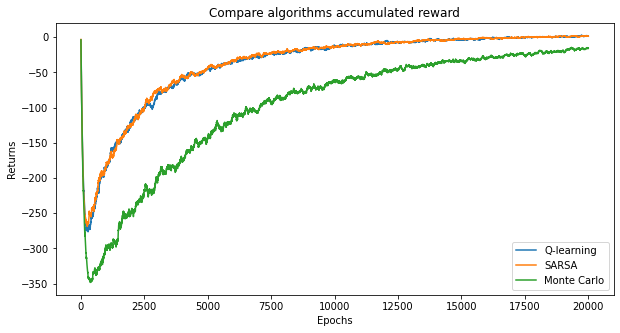

In [9]:
plt.figure(figsize=(10, 5),)
plt.plot(acc_return_q)
plt.plot(acc_return_sarsa)
plt.plot(acc_return_mc)
plt.xlabel('Epochs')
plt.ylabel('Returns')
plt.title('Compare algorithms accumulated reward')
plt.legend(['Q-learning', 'SARSA', 'Monte Carlo'])
plt.show()

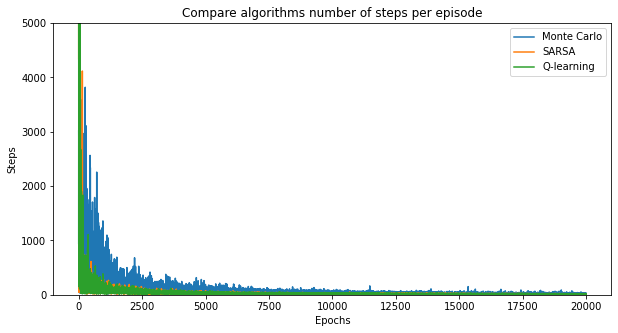

In [10]:
plt.figure(figsize=(10, 5),)
plt.plot(all_epochs_mc)
plt.plot(all_epochs_sarsa)
plt.plot(all_epochs_q)
plt.xlabel('Epochs')
plt.ylabel('Steps')
plt.title('Compare algorithms number of steps per episode')
plt.ylim([0, 5000])
plt.legend(['Monte Carlo', 'SARSA', 'Q-learning'])
plt.show()

In [15]:
# Evaluate agent's performance after Q-learning
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, reward = 0, 0
    done = False
    while not done:
        action = policy_q[state]
        state, reward, done, info = env.step(action)
        epochs += 1
        if epochs > 500:
            total_penalties += 1
            break
    total_epochs += epochs

print(f"Results after {episodes} episodes for Q-Learning:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Number of Penalties: {total_penalties}")

Results after 100 episodes for Q-Learning:
Average timesteps per episode: 12.9
Number of Penalties: 0


In [16]:
# Evaluate agent's performance after Q-learning
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, reward = 0, 0
    done = False
    while not done:
        action = policy_sarsa[state]
        state, reward, done, info = env.step(action)
        epochs += 1
        if epochs > 500:
            total_penalties += 1
            break
    total_epochs += epochs

print(f"Results after {episodes} episodes for SARSA:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Number of Penalties: {total_penalties}")

Results after 100 episodes for SARSA:
Average timesteps per episode: 13.27
Number of Penalties: 0


In [14]:
# Evaluate agent's performance after Q-learning
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, reward = 0, 0
    done = False
    while not done:
        action = policy_mc[state]
        state, reward, done, info = env.step(action)
        epochs += 1
        if epochs > 500:
            total_penalties += 1
            break
    total_epochs += epochs

print(f"Results after {episodes} episodes for Monte Carlo:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Number of Penalties: {total_penalties}")

Results after 100 episodes for Monte Carlo:
Average timesteps per episode: 37.59
Number of Penalties: 5
